In [1]:
#from Thesis.util.csv_visualisation import *
from Thesis.util.hdf5_visualisation import *

In [9]:
problem_names = ['DTLZ2']#, 'DTLZ3', 'JUSTICE']
moeas = ['eps_nsgaii','borg']#, 'generational_borg']
core_count = [4,8]
seeds = 2
metric_names = ['hypervolume', 'generational_distance', 'epsilon_indicator', 
               'archive_size', 'spread', 'spacing', 'time_efficiency', 'epsilon_progress']

Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Checking: hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Checking: hpc/results/DTLZ2/8core

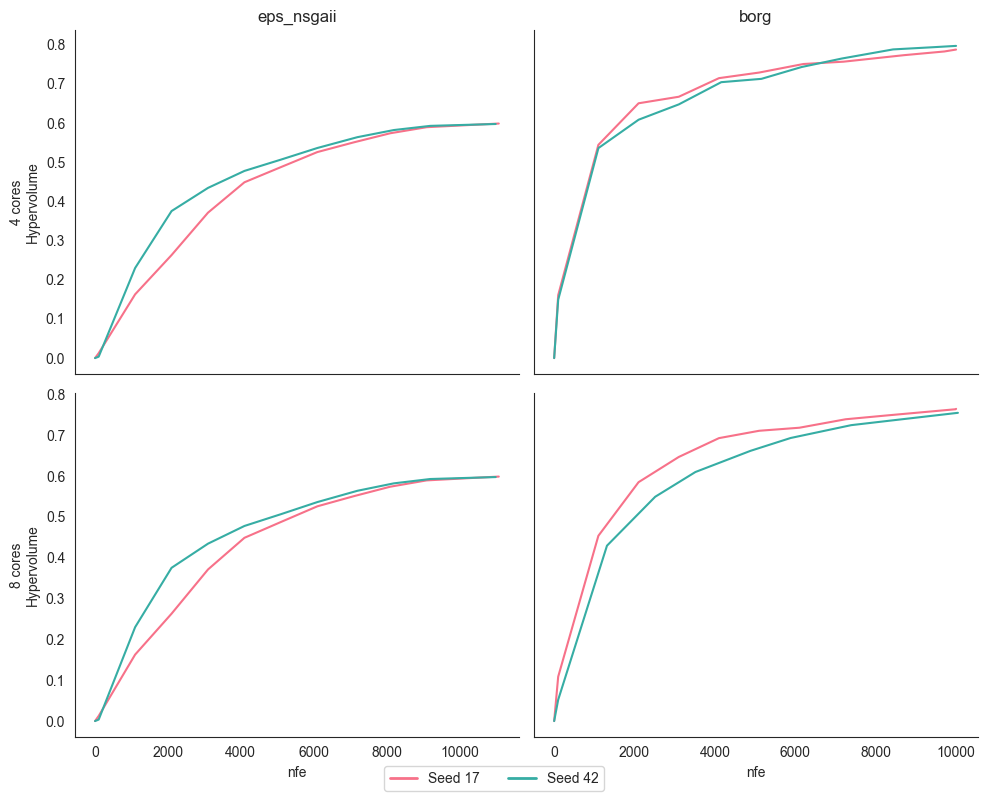

Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Checking: hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Checking: hpc/results/DTLZ2/8core

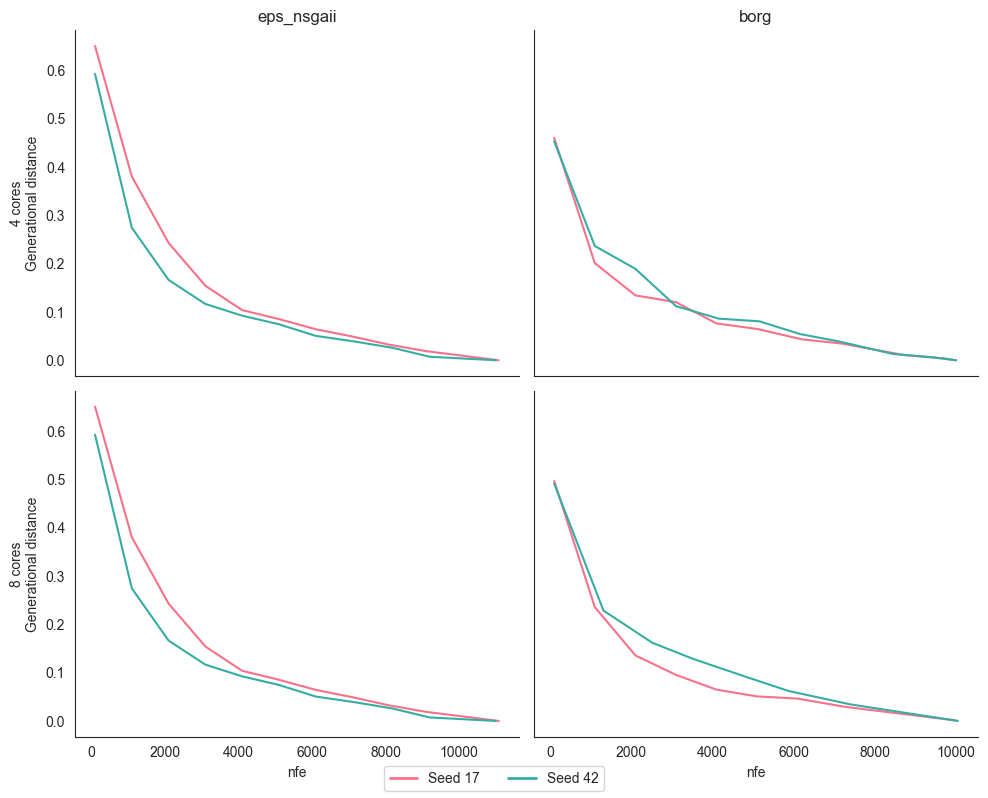

Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Checking: hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Checking: hpc/results/DTLZ2/8core

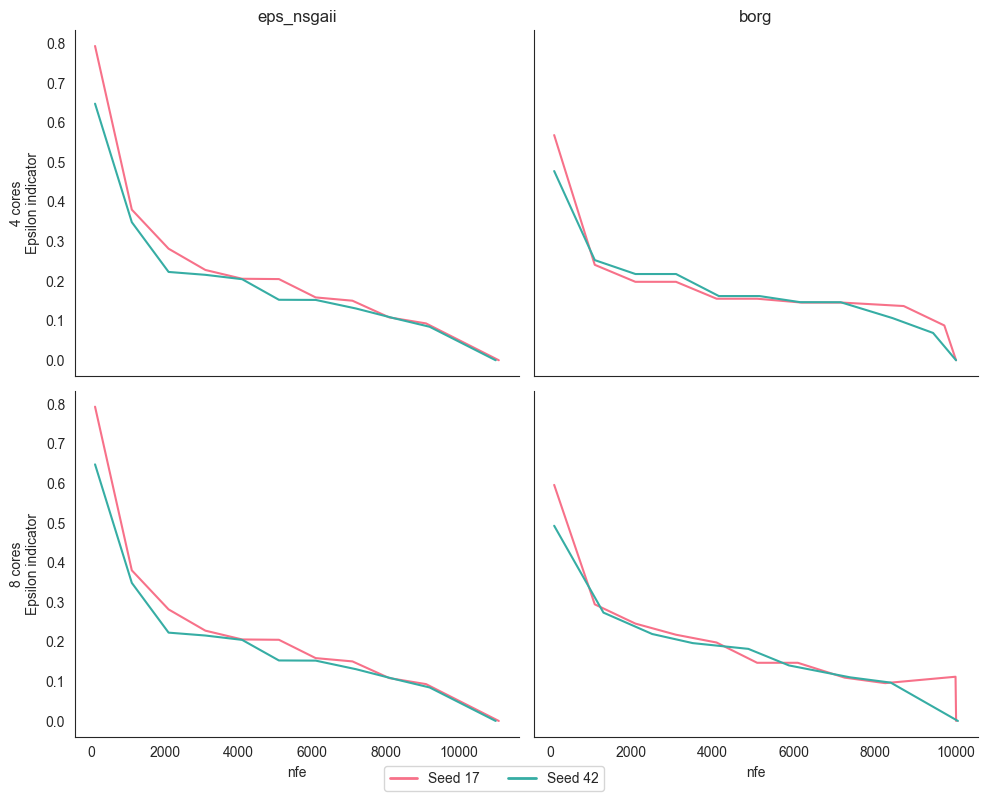

Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Checking: hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Checking: hpc/results/DTLZ2/8core

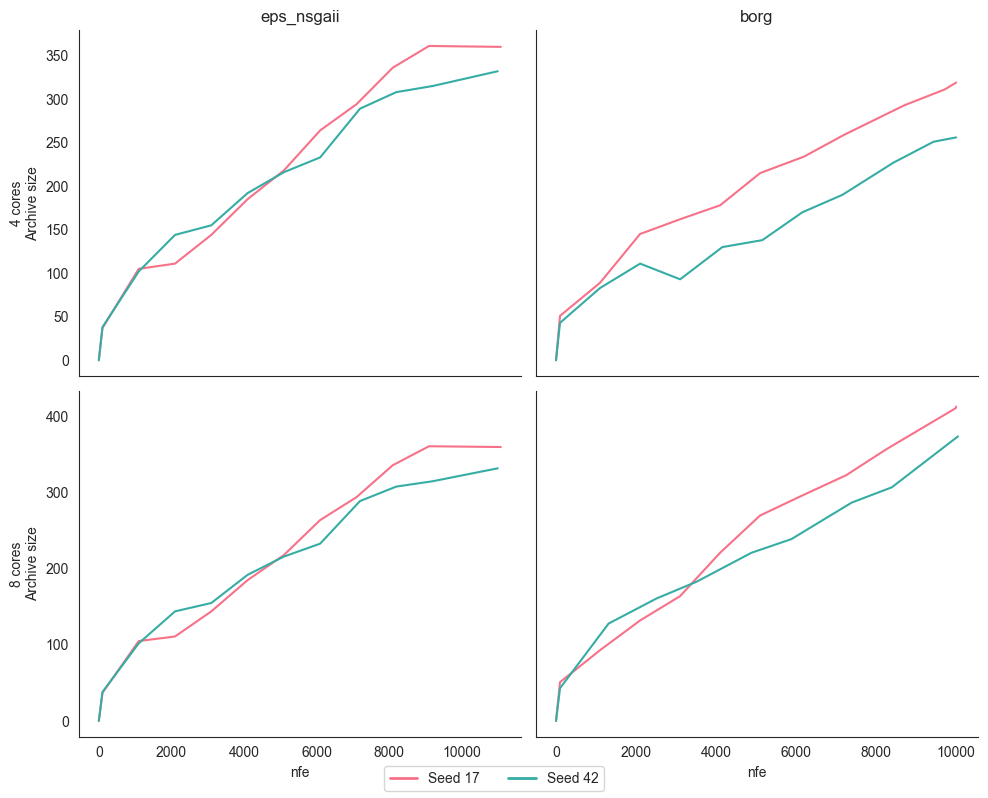

Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Checking: hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Checking: hpc/results/DTLZ2/8core

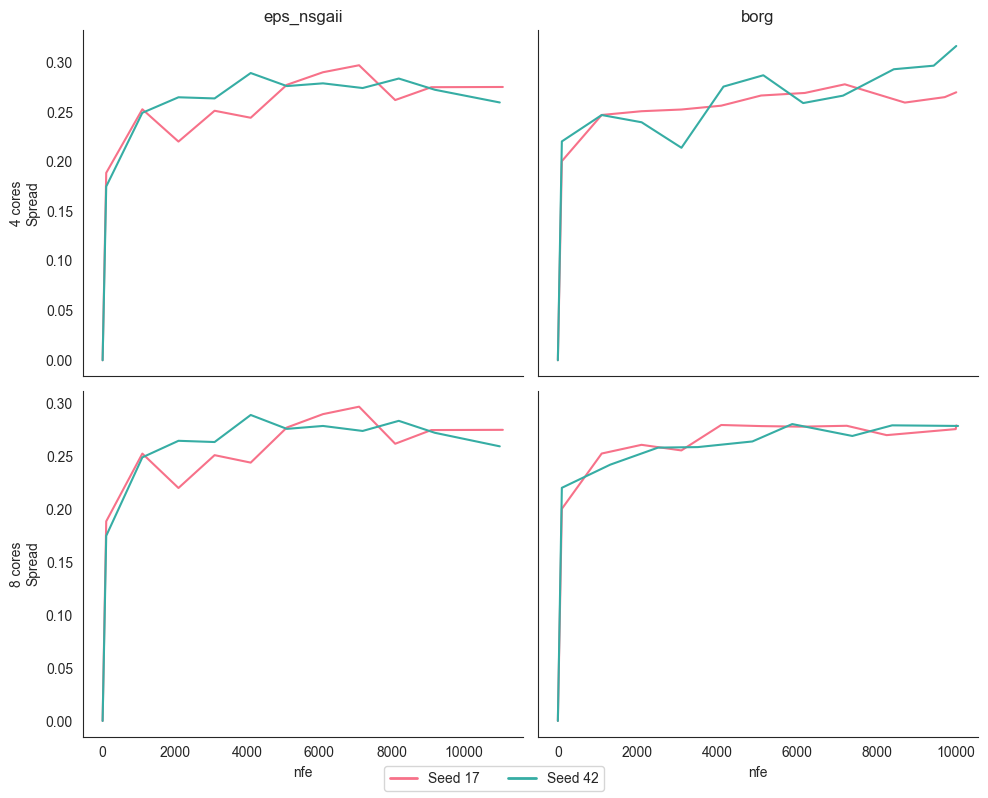

Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Checking: hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Checking: hpc/results/DTLZ2/8core

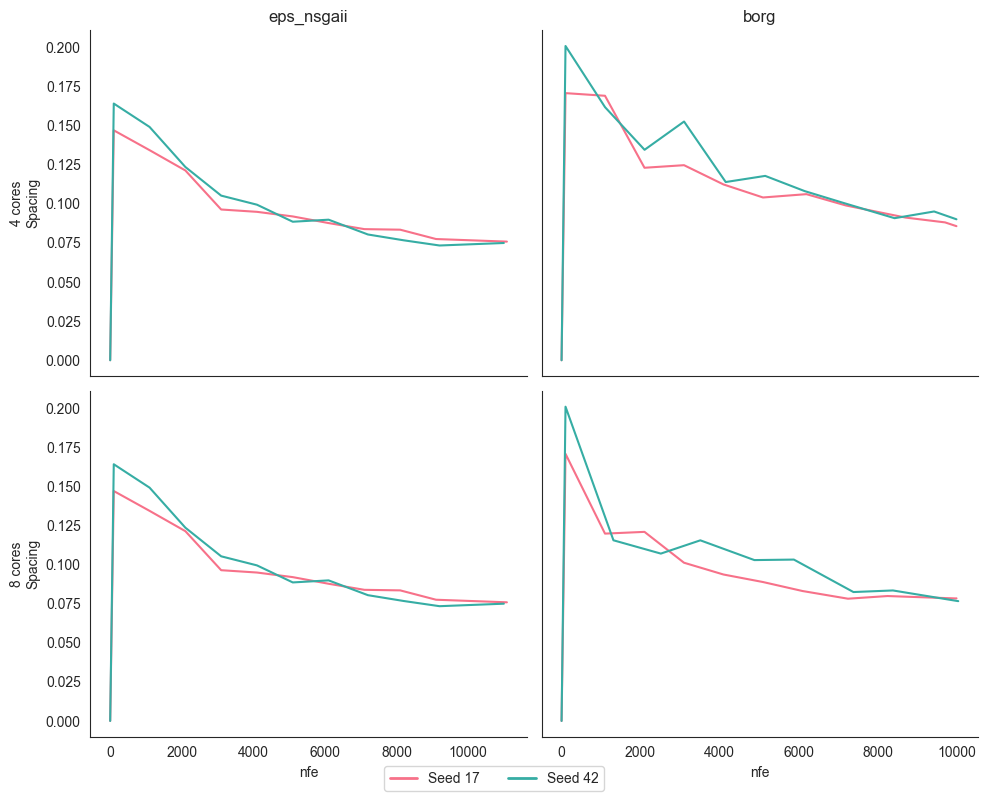

Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Checking: hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Checking: hpc/results/DTLZ2/8core

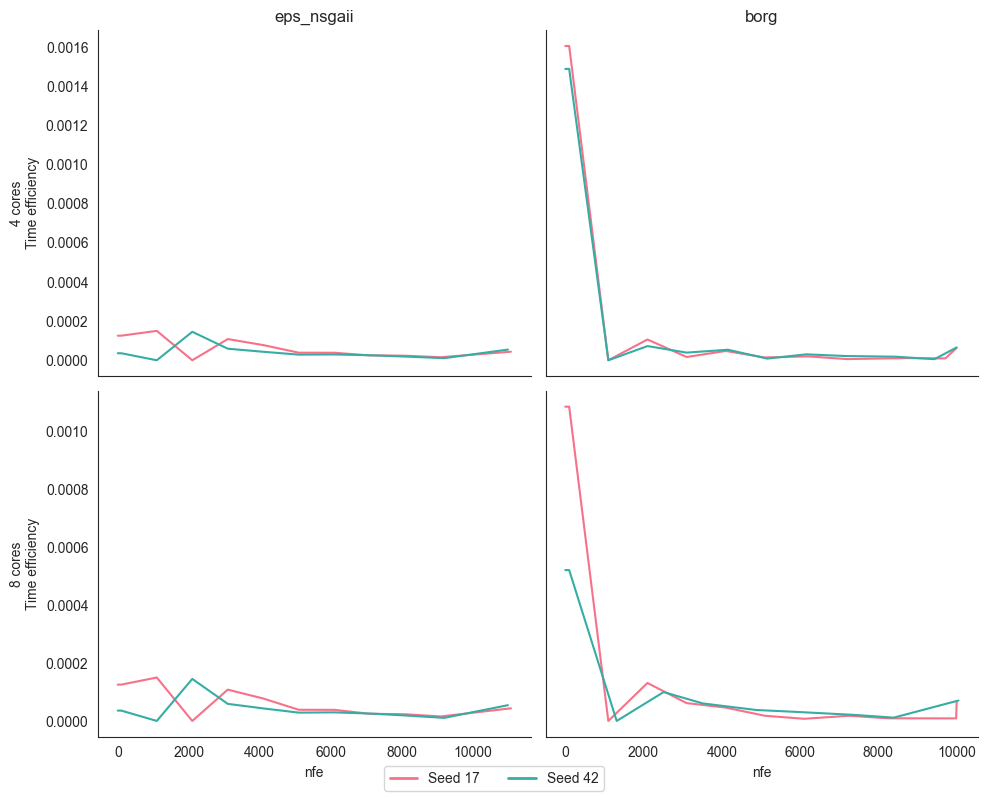

Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Loaded 2 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Loaded 2 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Loaded 2 datasets from hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Loaded 2 datasets from hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Checking: hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Loaded 2 datasets from hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Checking: hpc/results/DTLZ2/8core

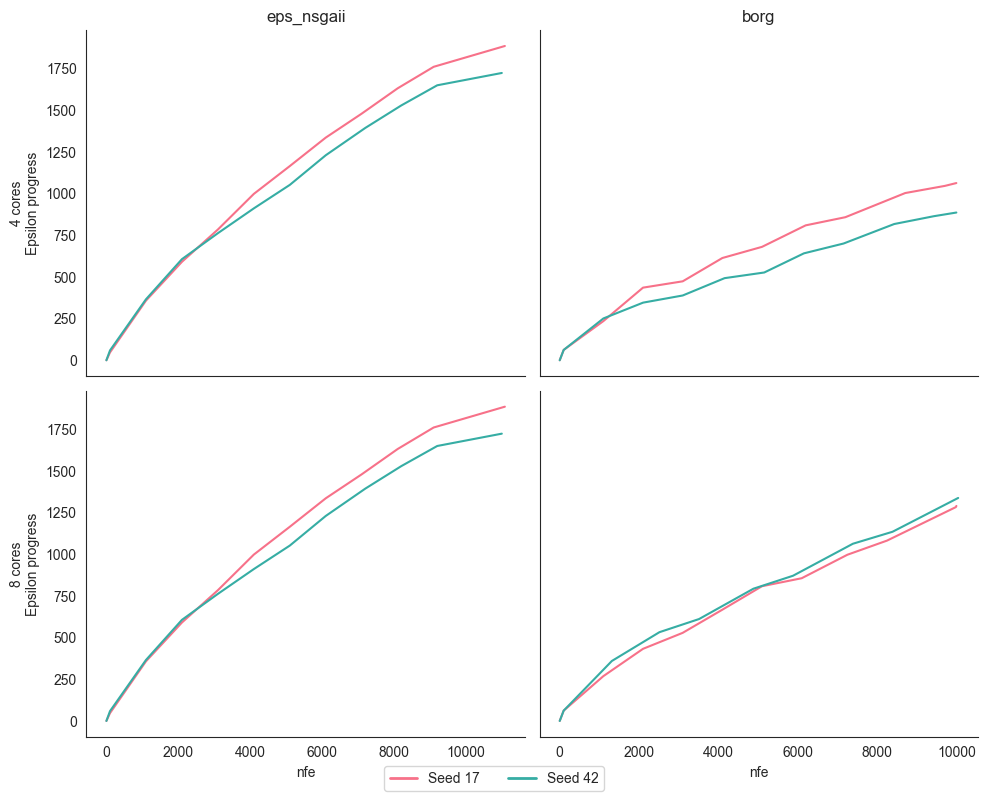

In [10]:
plot_metrics_by_cores(problem_names[0], moeas, core_count, metric_names)

Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Checking: hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Checking: hpc/results/DTLZ2/8core

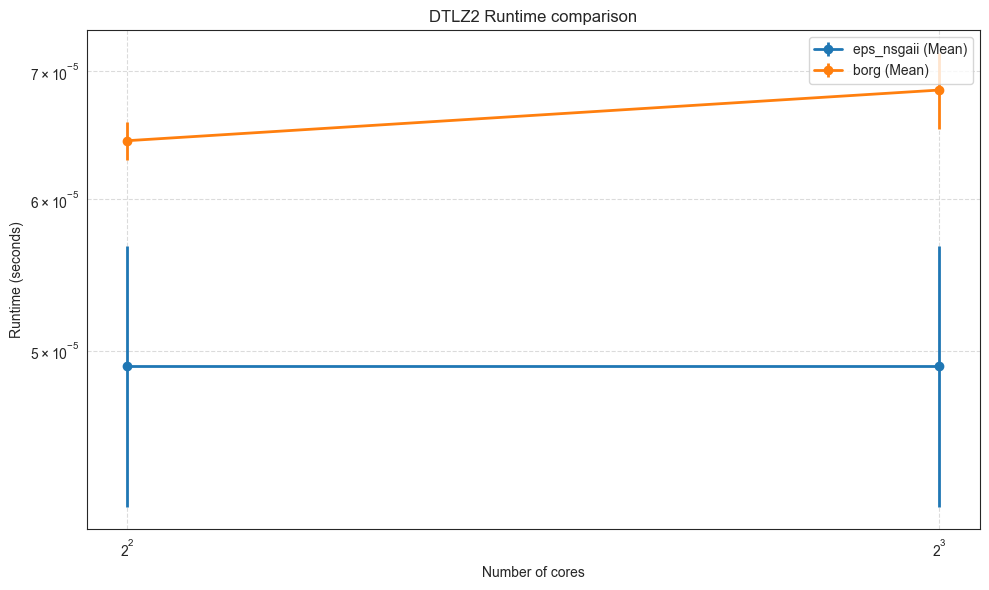

In [11]:
plot_runtime_comparison(problem_names[0], moeas, core_count)

Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Checking: hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Checking: hpc/results/DTLZ2/8core

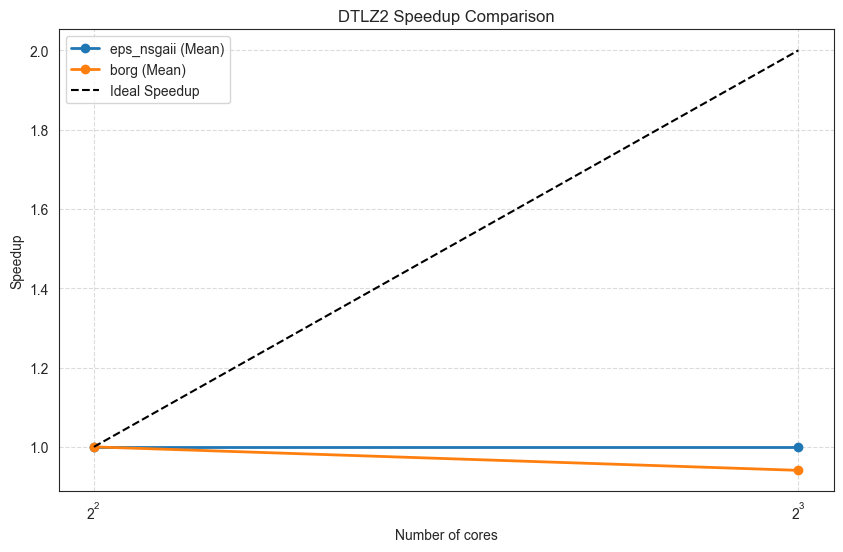

In [12]:
plot_speedup_comparison(problem_names[0], moeas, core_count)

Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Checking: hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Checking: hpc/results/DTLZ2/8core

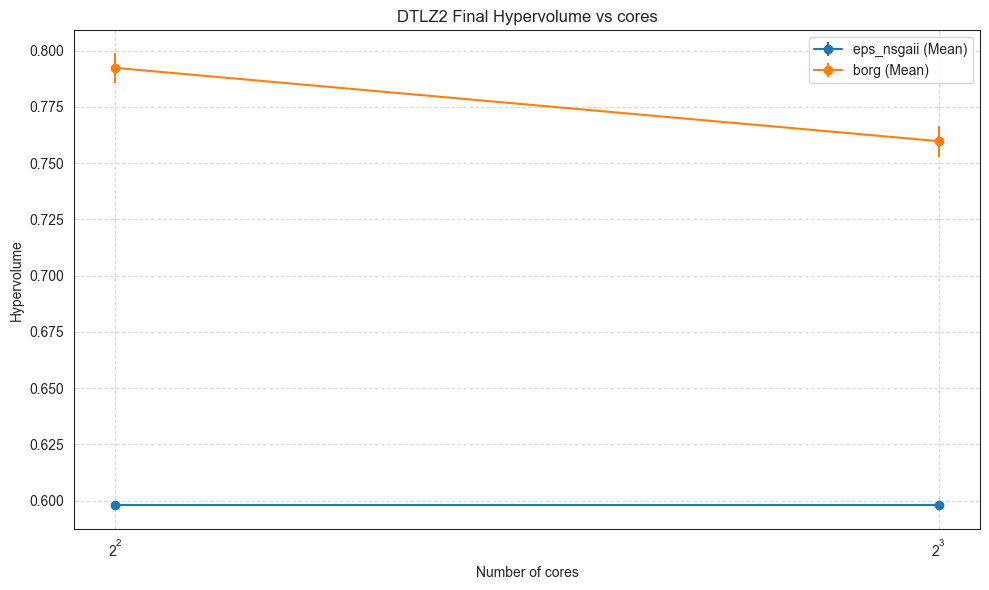

In [13]:
plot_final_metric_comparison(problem_names[0], moeas, core_count, 'hypervolume')

Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Checking: hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Checking: hpc/results/DTLZ2/8core

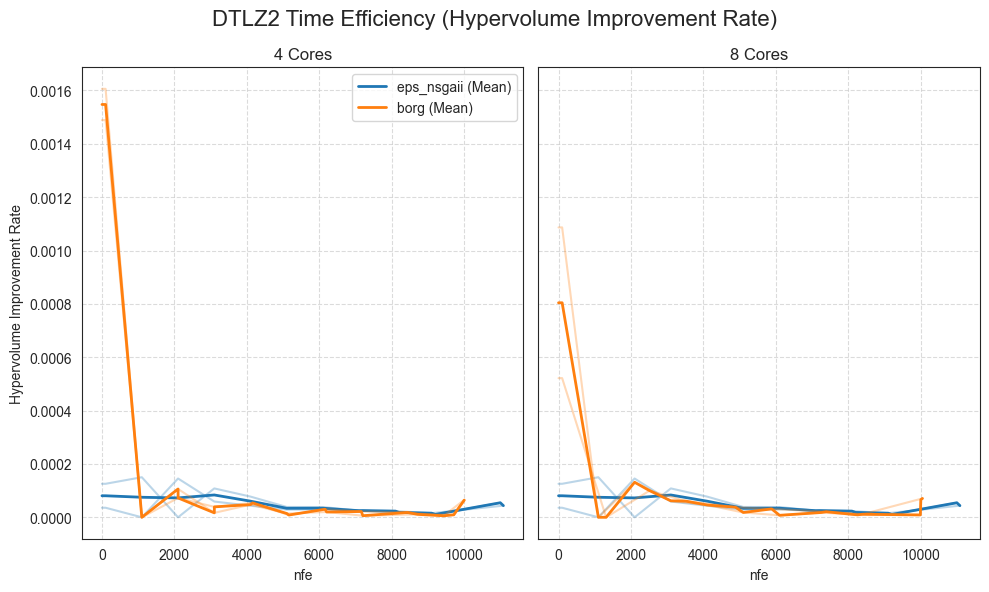

In [14]:
plot_hypervolume_efficiency(problem_names[0], moeas, core_count)

Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/eps_nsgaii/seed42/results_DTLZ2_eps_nsgaii_4cores_seed42.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed17/results_DTLZ2_borg_4cores_seed17.h5
Checking: hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Loaded 8 datasets from hpc/results/DTLZ2/4cores/borg/seed42/results_DTLZ2_borg_4cores_seed42.h5
Checking: hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Loaded 8 datasets from hpc/results/DTLZ2/8cores/eps_nsgaii/seed17/results_DTLZ2_eps_nsgaii_8cores_seed17.h5
Checking: hpc/results/DTLZ2/8core

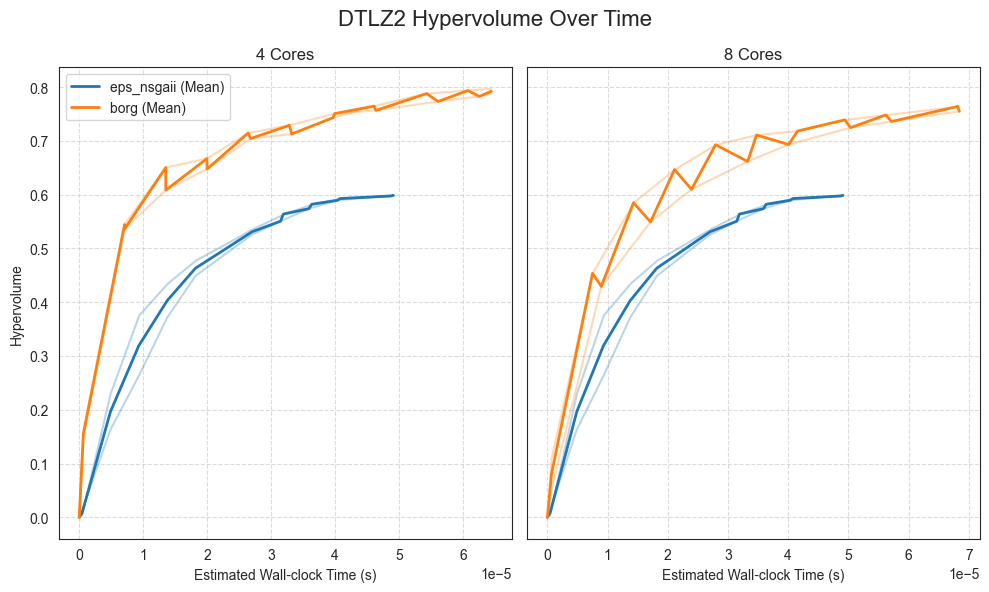

In [15]:
plot_hypervolume_over_time(problem_names[0], moeas, core_count)